In [3]:
import pandas as pd
import networkx as nx
import dask.dataframe as dd
from tqdm.notebook import tqdm
# from graph_tool.all import *

In [28]:
import graph_tools

In [29]:
help(graph_tools)

Help on package graph_tools:

NAME
    graph_tools

DESCRIPTION
    # Tools for graph theory and network science with many generation models.
    # Copyright (c) 2018-2019, Hiroyuki Ohsaki.
    # All rights reserved.
    #

PACKAGE CONTENTS


CLASSES
    builtins.object
        Graph
    
    class Graph(builtins.object)
     |  Graph(directed=True, multiedged=True)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, directed=True, multiedged=True)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  __repr__(self)
     |      Return repr(self).
     |  
     |  add_edge(self, u, v)
     |      Add an edge from vertex U to vertex V.
     |  
     |  add_edge_get_id = add_edge(self, u, v)
     |  
     |  add_vertex(self, v)
     |      Attach vertex V to the graph if it does not exist.
     |  
     |  add_vertices(self, *vertices)
     |      Attach vertices VERTICES to the graph while avoiding duplicates.
     |  
     |  adja

In [4]:
from dask.distributed import Client
client = Client(dashboard_address=':6784')
client

Client Scheduler: tcp://127.0.0.1:51430 Dashboard: http://127.0.0.1:6784/status,Cluster Workers: 4 Cores: 16 Memory: 34.27 GB


In [5]:
ds = pd.read_csv('../data/all_hashtags.csv')['0'].to_list()
ds[:10]

['YFM',
 'cinnamonroll',
 'Minnea',
 'cuckolding',
 'ทุกคนรู้',
 'sweatybetty',
 'JusticeForGeorgeFlloyd',
 'AlishaWalker',
 'CopRioters',
 'CummingMustGo']

In [6]:
G = nx.Graph()
G

In [7]:
df = dd.read_csv('../data/user_data_entity_splitup/*.csv')
df

,Unnamed: 0,user_name,hashtags,user_mentions,url
npartitions=1411,,,,,
,int64,object,object,object,object
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [8]:
# del df['Unnamed: 0']
df['hashtags'] = df.apply(lambda x: eval(x['hashtags']), axis=1, meta=list)
df

,Unnamed: 0,user_name,hashtags,user_mentions,url
npartitions=1411,,,,,
,int64,object,object,object,object
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [9]:
df['hashtags_count'] = df.apply(lambda x: len(x['hashtags']), axis=1, meta=int)
df.head()

,Unnamed: 0,user_name,hashtags,user_mentions,url,hashtags_count
0,0,11leets,[],['theBrianaJ'],[],0
1,1,1380KCIM,[],[],['https://t.co/nit7q0l3lz'],0
2,2,157Ram,[],['NotContinent'],[],0
3,3,15Catboy,[],"['_emilyhines_', 'lightperrysk']",['https://t.co/YXbl0D99YL'],0
4,4,1776_NOAH_711,[],['VincentCrypt46'],[],0


In [10]:
df_with_hashtags = df[df['hashtags_count'] != 0][['user_name', 'hashtags']]
df_with_hashtags

,user_name,hashtags
npartitions=1411,,
,object,object
,...,...
...,...,...
,...,...
,...,...


In [11]:
def edge_maker(user_name, hashtags):
    lst = []
    for hashtags in hashtags:
        lst.append((user_name, hashtags))
    return lst

df_with_hashtags['edge_strings'] = df_with_hashtags.apply(lambda x: edge_maker(x['user_name'], x['hashtags']), axis=1, meta=list)
df_with_hashtags.head()

,user_name,hashtags,edge_strings
11,434Italo,"[diegovelazquez, velázquez]","[(434Italo, diegovelazquez), (434Italo, velázq..."
19,Abeerzaidi7,[SyraYousuf],"[(Abeerzaidi7, SyraYousuf)]"
23,AhmedAdeb,[BlackLivesMatter],"[(AhmedAdeb, BlackLivesMatter)]"
40,AndNotAboutYou,"[2A, BLMTerrorism, DemocratsAreDestroyingAmerica]","[(AndNotAboutYou, 2A), (AndNotAboutYou, BLMTer..."
41,Andres76165212,[Dicklessrapist],"[(Andres76165212, Dicklessrapist)]"


In [12]:
length_of_hashtags = df_with_hashtags.shape[0].compute()
length_of_hashtags

184329

In [13]:
da = df_with_hashtags.compute()
da

,user_name,hashtags,edge_strings
11,434Italo,"[diegovelazquez, velázquez]","[(434Italo, diegovelazquez), (434Italo, velázq..."
19,Abeerzaidi7,[SyraYousuf],"[(Abeerzaidi7, SyraYousuf)]"
23,AhmedAdeb,[BlackLivesMatter],"[(AhmedAdeb, BlackLivesMatter)]"
40,AndNotAboutYou,"[2A, BLMTerrorism, DemocratsAreDestroyingAmerica]","[(AndNotAboutYou, 2A), (AndNotAboutYou, BLMTer..."
41,Andres76165212,[Dicklessrapist],"[(Andres76165212, Dicklessrapist)]"
...,...,...,...
1012,vnesssaa__,[annonymous],"[(vnesssaa__, annonymous)]"
1013,vvonderkth,"[2020BTSFESTA, 7주년맞이가족사진, 와글와글, 옹기종기, 문을열고들어왔더...","[(vvonderkth, 2020BTSFESTA), (vvonderkth, 7주년맞..."
1019,websterleone,[ballpoint],"[(websterleone, ballpoint)]"
1036,yojewale,"[justiceforjennifer, JusticeForUwa]","[(yojewale, justiceforjennifer), (yojewale, Ju..."


In [15]:
da.to_csv('../data/user_name_with_hashtags.csv')

In [17]:
da = pd.read_csv('../data/user_name_with_hashtags.csv', index_col=0)
da['edge_strings'] = da.apply(lambda x: eval(x['edge_strings']), axis=1)
da

,user_name,hashtags,edge_strings
11,434Italo,"['diegovelazquez', 'velázquez']","[(434Italo, diegovelazquez), (434Italo, velázq..."
19,Abeerzaidi7,['SyraYousuf'],"[(Abeerzaidi7, SyraYousuf)]"
23,AhmedAdeb,['BlackLivesMatter'],"[(AhmedAdeb, BlackLivesMatter)]"
40,AndNotAboutYou,"['2A', 'BLMTerrorism', 'DemocratsAreDestroying...","[(AndNotAboutYou, 2A), (AndNotAboutYou, BLMTer..."
41,Andres76165212,['Dicklessrapist'],"[(Andres76165212, Dicklessrapist)]"
...,...,...,...
1012,vnesssaa__,['annonymous'],"[(vnesssaa__, annonymous)]"
1013,vvonderkth,"['2020BTSFESTA', '7주년맞이가족사진', '와글와글', '옹기종기', ...","[(vvonderkth, 2020BTSFESTA), (vvonderkth, 7주년맞..."
1019,websterleone,['ballpoint'],"[(websterleone, ballpoint)]"
1036,yojewale,"['justiceforjennifer', 'JusticeForUwa']","[(yojewale, justiceforjennifer), (yojewale, Ju..."


In [13]:
ab = G.new_edge_property('string')
ab

<EdgePropertyMap object with value type 'string', for Graph 0x7f52a45335e0, at 0x7f522465ceb0>

In [18]:
for i in tqdm(da.iterrows(), total=184329):
    for j in i[1]['edge_strings']:
        G.add_edge(j[0], j[1])

In [19]:
help(G)

Help on Graph in module networkx.classes.graph object:

class Graph(builtins.object)
 |  Base class for undirected graphs.
 |  
 |  A Graph stores nodes and edges with optional data, or attributes.
 |  
 |  Graphs hold undirected edges.  Self loops are allowed but multiple
 |  (parallel) edges are not.
 |  
 |  Nodes can be arbitrary (hashable) Python objects with optional
 |  key/value attributes. By convention `None` is not used as a node.
 |  
 |  Edges are represented as links between nodes with optional
 |  key/value attributes.
 |  
 |  Parameters
 |  ----------
 |  incoming_graph_data : input graph (optional, default: None)
 |      Data to initialize graph. If None (default) an empty
 |      graph is created.  The data can be any format that is supported
 |      by the to_networkx_graph() function, currently including edge list,
 |      dict of dicts, dict of lists, NetworkX graph, NumPy matrix
 |      or 2d ndarray, SciPy sparse matrix, or PyGraphviz graph.
 |  
 |  attr : keyw

In [21]:
nx.write_gml(G, "../data/hashtag_graph.gml")

In [ ]:
nx.write_edgelist(G, 'hashtag_network.edgelist')

In [25]:
G = nx.read_gml('../data/hashtag_graph.gml')
G

In [27]:
k_components = nx.k_components(G)
k_components

KeyboardInterrupt: 

In [ ]:
list(G['434Italo'])

In [22]:
ga = [('434Italo', 'diegovelazquez'), ('434Italo', 'velázquez')]
g1 = nx.Graph()
g1.add_edges_from(ga)
g1

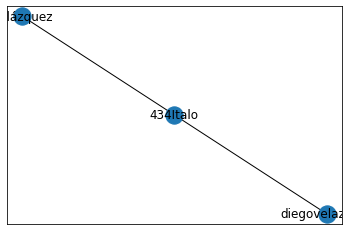

In [23]:
nx.draw_networkx(g1)

In [ ]:
pos = nx.nx_pydot.graphviz_layout(g1)#len(G)
pos

In [ ]:
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw_networkx(G, pos)
plt.savefig('networkx_graph.png')

In [ ]:
nx.draw_graphviz(G)
plt.savefig("path.png")